dividing objects between two people, BFS Traversal:


 1 items: {'1': 81}
Egalitarian Partitioning: [81, 0]
1.0 times more states without pruning

 2 items: {'1': 81, '2': 27}
Egalitarian Partitioning: [27, 81]
1.0 times more states without pruning

 3 items: {'1': 81, '2': 27, '3': 2}
Egalitarian Partitioning: [29, 81]
1.0 times more states without pruning

 4 items: {'1': 81, '2': 27, '3': 2, '4': 94}
Egalitarian Partitioning: [96, 108]
1.0 times more states without pruning

 5 items: {'1': 81, '2': 27, '3': 2, '4': 94, '5': 89}
Egalitarian Partitioning: [96, 108]
1.0 times more states without pruning

 6 items: {'1': 81, '2': 27, '3': 2, '4': 94, '5': 89, '6': 45}
Egalitarian Partitioning: [168, 170]
1.0 times more states without pruning

 7 items: {'1': 81, '2': 27, '3': 2, '4': 94, '5': 89, '6': 45, '7': 90}
Egalitarian Partitioning: [168, 170]
1.0 times more states without pruning

 8 items: {'1': 81, '2': 27, '3': 2, '4': 94, '5': 89, '6': 45, '7': 90, '8': 70}
Egalitarian Parti

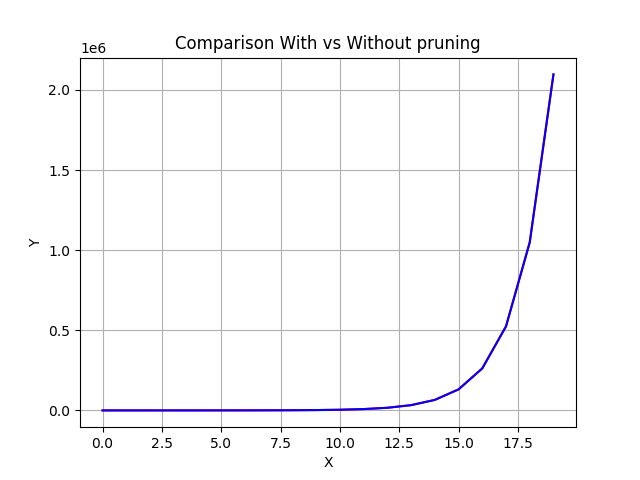

In [4]:
%pip install matplotlib

import random
import matplotlib.pyplot as plt

egalitarian_choice = [0, 0]


def BFS(items, node, pruning=False):
    visited = []  # List for visited nodes
    states = {}
    list_states = []
    queue = []  # Initialize a queue
    visited.append(node)
    queue.append(node)
    list_states.append(node)
    while queue:  # Creating loop to visit each node
        m = queue.pop()
        states[m] = kids(m, items)
        for neighbour in states[m]:
            list_states.append(neighbour)
            if pruning:
                if neighbour not in visited:
                    visited.append(neighbour)
                    queue.append(neighbour)
            else:
                visited.append(neighbour)
                queue.append(neighbour)
    egalitarian_choice = [0, 0]
    return len(list_states)


def check_egalitarian(vector):
    global egalitarian_choice
    temp = egalitarian_choice
    if egalitarian_choice == [0, 0]:
        egalitarian_choice = vector
    if abs(temp[0] - temp[1]) > abs(vector[0] - vector[1]):
        egalitarian_choice = vector


# for finding the "kids" of each state
def kids(vec, items):
    lst = []
    temp_vec = list(vec)
    for i in range(len(vec) - 1):
        if temp_vec[len(vec) - 1] == len(items):
            break
        temp_vec[len(vec) - 1] += 1
        temp_vec[i] += items[str(temp_vec[len(vec) - 1])]
        if temp_vec[len(vec) - 1] == len(items):
            check_egalitarian(temp_vec)
        lst.append(tuple(temp_vec))
        temp_vec = list(vec)
    return lst


if __name__ == '__main__':
    items = {}
    points = []
    without_points = []
    num_of_states = 0
    print("dividing objects between two people, BFS Traversal:\n")
    for i in range(1, 21):
        items[str(i)] = random.randint(0, 100)
        vector = (0, 0, 0)
        print("\n", len(items.keys()), "items:", items)
        num_of_states = BFS(items, vector)
        points.append(num_of_states)
        num_of_states_prun = BFS(items, vector, True)
        without_points.append(num_of_states)
        print("Egalitarian Partitioning:", egalitarian_choice[0:2])
        print(num_of_states / num_of_states_prun, "times more states without pruning")
    plt.plot(points, 'red')
    plt.plot(without_points, 'blue')
    plt.title("Comparison With vs Without pruning")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.show()
